# Comparación de trayectorias de algoritmos de optimización en Deep Learning

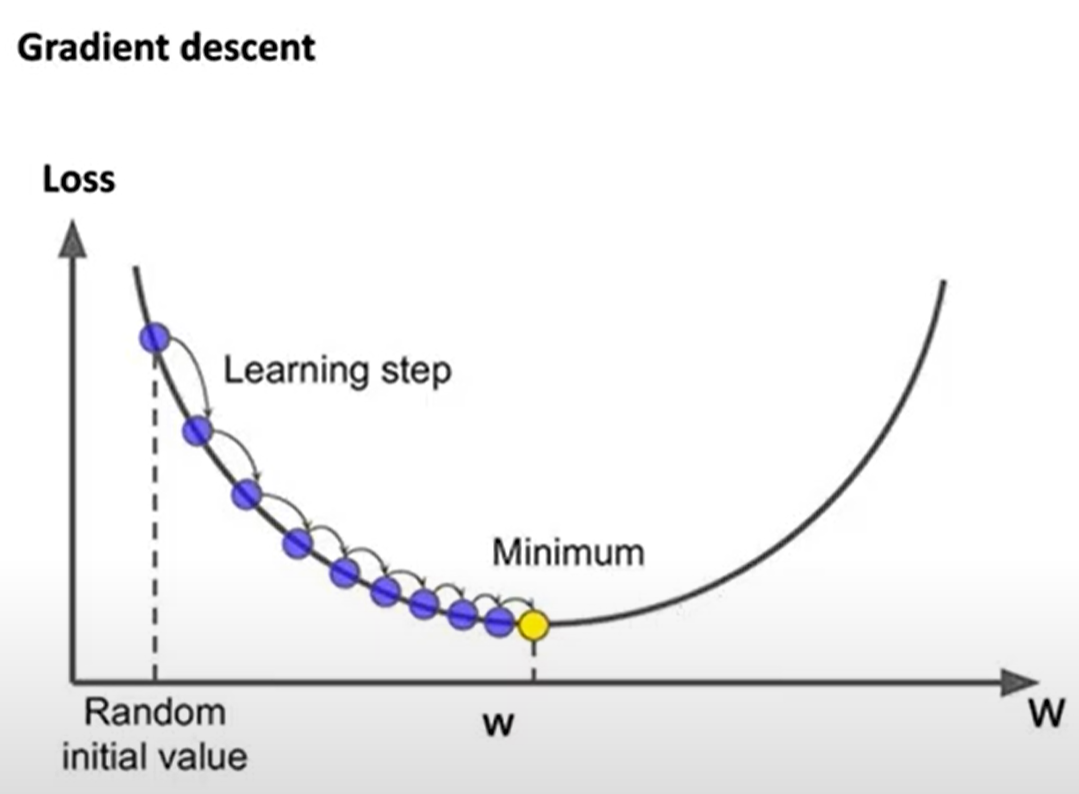

Referencias:



1.   https://gist.github.com/jcmgray/e0ab3458a252114beecb1f4b631e19ab
2.   http://louistiao.me/notes/visualizing-and-animating-optimization-algorithms-with-matplotlib/



In [134]:
import matplotlib.pyplot as plt
import autograd.numpy as np

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from matplotlib import animation
from IPython.display import HTML

from autograd import elementwise_grad, value_and_grad
from scipy.optimize import minimize
from collections import defaultdict
from itertools import zip_longest
from functools import partial

In [135]:
f  = lambda x, y: (x**2 + y - 11)**2 + (x + y**2 - 7)**2

In [136]:
xmin, xmax, xstep = -4, 4, .1
ymin, ymax, ystep = -4, 4, .1

In [137]:
x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))

In [138]:
z = f(x, y)

In [139]:
minima1 = np.array([3, 2])
minima2 = np.array([-2.8051, 3.1313])
minima3 = np.array([-3.7793, -3.2831])
minima4 = np.array([3.5844, -1.8481])

In [142]:
print(f(*minima1))
print(f(*minima2))
print(f(*minima3))
print(f(*minima4)) #valores muy cercanos a cero

0
1.6631016200238794e-08
3.074203521985237e-07
4.7176121700449926e-08


In [143]:
minima_1 = minima1.reshape(-1, 1)
minima_2 = minima2.reshape(-1, 1)
minima_3 = minima3.reshape(-1, 1)
minima_4 = minima4.reshape(-1, 1)

print(f(*minima_1))
print(f(*minima_2))
print(f(*minima_3))
print(f(*minima_4))


[0]
[1.66310162e-08]
[3.07420352e-07]
[4.71761217e-08]


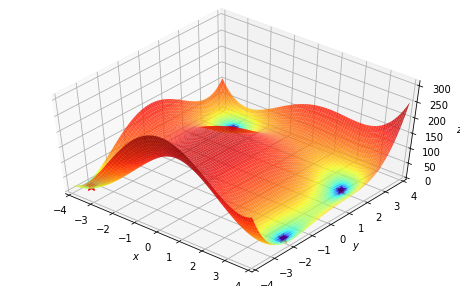

In [338]:
fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d', elev=50, azim=-50)

ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1, 
                edgecolor='none', alpha=.8, cmap=plt.cm.jet)
ax.plot(*minima_1, f(*minima_1), 'r*', markersize=10)
ax.plot(*minima_2, f(*minima_2), 'r*', markersize=10)
ax.plot(*minima_3, f(*minima_3), 'r*', markersize=10)
ax.plot(*minima_4, f(*minima_4), 'r*', markersize=10)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

plt.show()

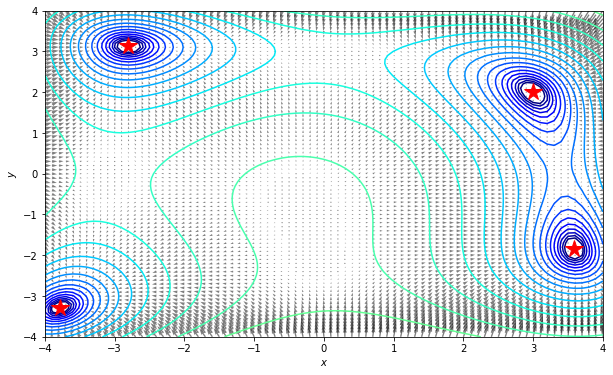

In [146]:
dz_dx = elementwise_grad(f, argnum=0)(x, y)
dz_dy = elementwise_grad(f, argnum=1)(x, y)

fig, ax = plt.subplots(figsize=(10, 6))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.quiver(x, y, x - dz_dx, y - dz_dy, alpha=.5)
ax.plot(*minima_1, 'r*', markersize=18)
ax.plot(*minima_2, 'r*', markersize=18)
ax.plot(*minima_3, 'r*', markersize=18)
ax.plot(*minima_, 'r*', markersize=18)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

plt.show()

Colocando el punto inicial para todos los algoritmos a probar:



In [322]:
x0 = np.array([-0.6, -0.84])

In [323]:
func = value_and_grad(lambda args: f(*args))

In [324]:
res = minimize(func, x0=x0, method='BFGS',
               jac=True, tol=1e-20, callback=print)

[-3.27846599 -0.879931  ]
[-3.47548898 -0.99542274]
[-4.14334378 -2.54030315]
[-4.30611518 -2.9909216 ]
[-4.21279542 -3.25103984]
[-3.83952636 -3.29935182]
[-3.78742263 -3.28135132]
[-3.77948756 -3.28414675]
[-3.77925622 -3.28306927]
[-3.77931048 -3.28318595]
[-3.77931025 -3.28318599]
[-3.77931025 -3.28318599]
[-3.77931025 -3.28318599]


In [325]:
dict(res)

{'fun': 7.888609052210118e-31,
 'jac': array([-1.77635684e-15,  1.16642198e-14]),
 'hess_inv': array([[0.00935143, 0.00302052],
        [0.00302052, 0.0122964 ]]),
 'nfev': 23,
 'njev': 23,
 'status': 2,
 'success': False,
 'message': 'Desired error not necessarily achieved due to precision loss.',
 'x': array([-3.77931025, -3.28318599]),
 'nit': 13}

In [326]:
def make_minimize_cb(path=[]):
    
    def minimize_cb(xk):
        # note that we make a deep copy of xk
        path.append(np.copy(xk))

    return minimize_cb

In [327]:
path_ = [x0]
res = minimize(func, x0=x0, method='BFGS',
               jac=True, tol=1e-20, callback=make_minimize_cb(path_))
path = np.array(path_).T
path.shape

(2, 14)

Text(0.5, 1.0, 'BFGS')

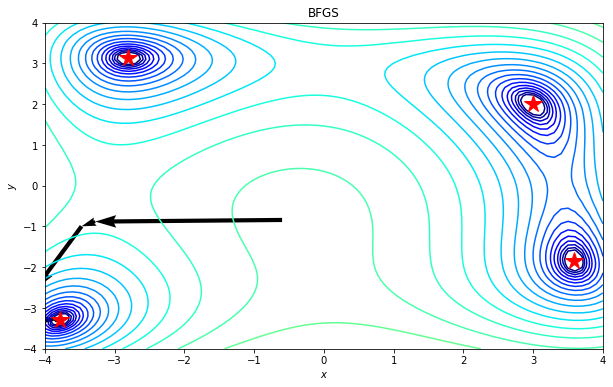

In [328]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.quiver(path[0,:-1], path[1,:-1], path[0,1:]-path[0,:-1], path[1,1:]-path[1,:-1], scale_units='xy', angles='xy', scale=1, color='k')
ax.plot(*minima_1, 'r*', markersize=18)
ax.plot(*minima_2, 'r*', markersize=18)
ax.plot(*minima_3, 'r*', markersize=18)
ax.plot(*minima_4, 'r*', markersize=18)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))
ax.set_title("BFGS")

# SGD

In [279]:
import numpy as np
from scipy.optimize import OptimizeResult

def sgd(
    fun,
    x0,
    jac,
    args=(),
    learning_rate=0.001,
    mass=0.9,
    startiter=0,
    maxiter=5000,
    callback=None,
    **kwargs
):
    """``scipy.optimize.minimize`` compatible implementation of stochastic
    gradient descent with momentum.
    Adapted from ``autograd/misc/optimizers.py``.
    """
    x = x0
    velocity = np.zeros_like(x)

    for i in range(startiter, startiter + maxiter):
        g = jac(x)

        if callback and callback(x):
            break

        velocity = mass * velocity - (1.0 - mass) * g
        x = x + learning_rate * velocity

    i += 1
    return OptimizeResult(x=x, fun=fun(x), jac=g, nit=i, nfev=i, success=True)

# RMSProp

In [280]:
def rmsprop(
    fun,
    x0,
    jac,
    args=(),
    learning_rate=0.1,
    gamma=0.9,
    eps=1e-8,
    startiter=0,
    maxiter=5000,
    callback=None,
    **kwargs
):
    """``scipy.optimize.minimize`` compatible implementation of root mean
    squared prop: See Adagrad paper for details.
    Adapted from ``autograd/misc/optimizers.py``.
    """
    x = x0
    avg_sq_grad = np.ones_like(x)

    for i in range(startiter, startiter + maxiter):
        g = jac(x)

        if callback and callback(x):
            break

        avg_sq_grad = avg_sq_grad * gamma + g**2 * (1 - gamma)
        x = x - learning_rate * g / (np.sqrt(avg_sq_grad) + eps)

    i += 1
    return OptimizeResult(x=x, fun=fun(x), jac=g, nit=i, nfev=i, success=True)

# Adam

In [281]:
def adam(
    fun,
    x0,
    jac,
    args=(),
    learning_rate=0.001,
    beta1=0.9,
    beta2=0.999,
    eps=1e-8,
    startiter=0,
    maxiter=5000,
    callback=None,
    **kwargs
):
    """``scipy.optimize.minimize`` compatible implementation of ADAM -
    [http://arxiv.org/pdf/1412.6980.pdf].
    Adapted from ``autograd/misc/optimizers.py``.
    """
    x = x0
    m = np.zeros_like(x)
    v = np.zeros_like(x)

    for i in range(startiter, startiter + maxiter):
        g = jac(x)

        if callback and callback(x):
            break

        m = (1 - beta1) * g + beta1 * m  # first  moment estimate.
        v = (1 - beta2) * (g**2) + beta2 * v  # second moment estimate.
        mhat = m / (1 - beta1**(i + 1))  # bias correction.
        vhat = v / (1 - beta2**(i + 1))
        x = x - learning_rate * mhat / (np.sqrt(vhat) + eps)

    i += 1
    return OptimizeResult(x=x, fun=fun(x), jac=g, nit=i, nfev=i, success=True)

# Implementacion

In [317]:
methods = [
    sgd,
    rmsprop,
    adam
#     "BFGS",
#     "Newton-CG",
#     "L-BFGS-B",
#     "TNC",
#     "SLSQP"
]

In [329]:
path_ = [x0]
res = minimize(func, x0=x0, method=methods[0],
               jac=True, tol=1e-20, callback=make_minimize_cb(path_))
path0 = np.array(path_).T

In [330]:
path_ = [x0]
res = minimize(func, x0=x0, method=methods[1],
               jac=True, tol=1e-20, callback=make_minimize_cb(path_))
path1 = np.array(path_).T

In [331]:
path_ = [x0]
res = minimize(func, x0=x0, method=methods[2],
               jac=True, tol=1e-20, callback=make_minimize_cb(path_))
path2 = np.array(path_).T

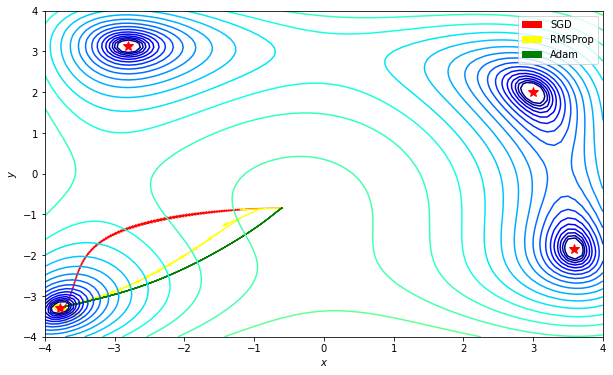

In [332]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.quiver(path0[0,:-1], path0[1,:-1], path0[0,1:]-path0[0,:-1], path0[1,1:]-path0[1,:-1], 
          scale_units='xy', angles='xy', scale=0.5, color='red', label="SGD")
ax.quiver(path1[0,:-1], path1[1,:-1], path1[0,1:]-path1[0,:-1], path1[1,1:]-path1[1,:-1], 
          scale_units='xy', angles='xy', scale=0.5, color='yellow', label="RMSProp")
ax.quiver(path2[0,:-1], path2[1,:-1], path2[0,1:]-path2[0,:-1], path2[1,1:]-path2[1,:-1], 
          scale_units='xy', angles='xy', scale=0.5, color='green', label="Adam")
ax.plot(*minima_1, 'r*', markersize=10)
ax.plot(*minima_2, 'r*', markersize=10)
ax.plot(*minima_3, 'r*', markersize=10)
ax.plot(*minima_4, 'r*', markersize=10)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

ax.legend(loc='best')

# RMSProp raw

In [131]:
# optimizador rmsprop
def rmsprop(objective, derivative, bounds, n_iter=5000,step_size=0.01, rho=0.99):
    '''Implementacion del algoritmo RMSProp.'''
        
	# seguimiento de todas las soluciones
    
	# generar un punto inicial
    xk = np.array([4,-3])
    x_vect = [xk]
    # lista de los gradientes cuadrados promedio para cada variable
    sq_grad_avg = [0.0 for _ in range(bounds.shape[0])]
	# ejecutar el descenso de gradiente

    for it in range(n_iter):
		# calcular gradiente
        gradient = derivative(xk)
		# actualizar el promedio de las derivadas parciales al cuadrado
        for i in range(gradient.shape[0]):
			# calcular el gradiente al cuadrado
            sg = gradient[i]**2.0
			# actualizar el promedio movil del gradiente al cuadrado
            sq_grad_avg[i] = (sq_grad_avg[i] * rho) + (sg * (1.0-rho))
		# construir solucion
        new_solution = list()
        for i in range(xk.shape[0]):
			# calcular la tasa de aprendizaje para esta variable
            alpha = step_size / (1e-8 + sqrt(sq_grad_avg[i]))
			# calcular la nueva posicion en esta variable
            value = xk[i] - alpha * gradient[i]
            new_solution.append(value)
		# almacenar la nueva solucion
        xk = asarray(new_solution)
        x_vect.append(xk)
    return x_vect
    

bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])
# realizar la búsqueda con RMSProp
rmsprop_results = rmsprop(objective, derivative, bounds)

# Adam raw

In [132]:
# optimizador adam
def adam(objective, derivative, bounds, n_iter=5000, alpha=0.01, beta1=0.9, beta2=0.999, eps=1e-8): #parametros establecidos por los autores
	'''
	Implementacion del algoritmo Adam. Iteraciones totales definidas.
	alpha = Tamaño de los pasos (learning rate, eta, alpha), 0.001
	beta1 = factor para gradiente medio, 0.9
	beta2 = factor para gradiente cuadrático medio, 0.999
	'''
	
	# generar un punto inicial
	x = np.array([4, -3]) #Punto inicial usado en las demas aplicaciones del trabajo realizado sobre la funcion de Himmelblau
	xk_vect = [x]
	score = objective(x)
	# inicializar el primer y segundo momento en cero siempre
	m = [0.0 for _ in range(bounds.shape[0])]
	v = [0.0 for _ in range(bounds.shape[0])]
	# ejecutar las actualizaciones de descenso de gradiente
	for t in range(n_iter):
		# calcular gradiente g(t)
		g = derivative(x)
		# construir una solución una variable a la vez
		for i in range(bounds.shape[0]):
			m[i] = beta1 * m[i] + (1.0 - beta1) * g[i]
			v[i] = beta2 * v[i] + (1.0 - beta2) * g[i]**2
			mhat = m[i] / (1.0 - beta1**(t+1))
			vhat = v[i] / (1.0 - beta2**(t+1))
			x[i] = x[i] - alpha * mhat / (sqrt(vhat) + eps)
		# evaluar punto candidato
		score = objective(x)
		# realizar un seguimiento de las soluciones
		xk_vect.append(x.copy())
		# devolver progreso de la iteracion
		#print('>%d f(%s) = %.5f' % (t, x, score))
	return xk_vect

bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])

# realizar la búsqueda con adam
adam_results = adam(objective, derivative, bounds)

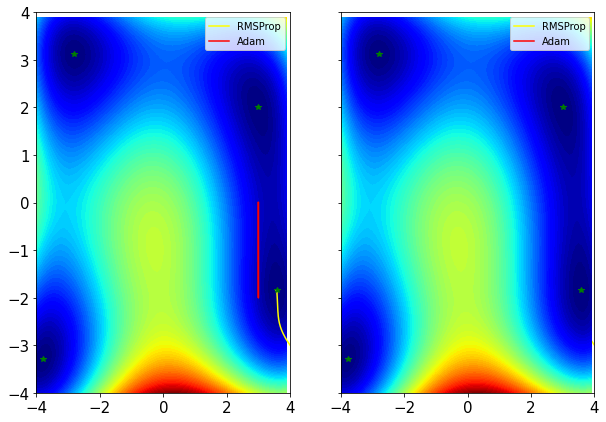

In [133]:
def return_appropriate_result_column(list_of_lists):
    '''
    Funcion que retorna una lista de listas segun puntos resultado del metodo.
    '''
    xvect = [row[0] for row in list_of_lists]
    yvect = [row[1] for row in list_of_lists]
    return [xvect, yvect]

# definir el rango del input
r_min, r_max = -4.0, 4.0
# rango de entrada de muestra uniformemente en incrementos de 0.1
xaxis = arange(r_min, r_max, 0.1)
yaxis = arange(r_min, r_max, 0.1)
# crear una malla a partir del eje
x, y = meshgrid(xaxis, yaxis)
# computar objetivos
results = objective([x, y])

# definir set de pasos tomados para llegar al optimo
#optima_gdm = return_appropriate_result_column(gdm_results)
optima_rmsprop = return_appropriate_result_column(rmsprop_results)
optima_adam = return_appropriate_result_column(adam_results)

fig, axes = plt.subplots(1,2, sharey=True, figsize=(10,7))
for ax, zord in zip(axes, [1,-1]):
    # crear un gráfico de contorno lleno con 100 niveles y un esquema de color jet
    ax.contourf(x, y, results, levels=100, cmap='jet')
    ax.autoscale(False) # Para evitar que cambios de límite
    #ax.plot(optima_gdm[0], optima_gdm[1], zorder=zord, color='red', label = "GDM")
    ax.plot(optima_rmsprop[0], optima_rmsprop[1], zorder=zord, color='yellow', label = "RMSProp")
    ax.plot(optima_adam[0], optima_adam[1], zorder=zord, color='red', label = "Adam")
    ax.plot(3, 2, '*', color='green', label = '_Op0') # Punto de optimos 1 [MINIMO]
    ax.plot(-2.8051, 3.1313, '*', color='green', label = '_Op1') # Punto de optimos 8 [MINIMO]
    ax.plot(-3.7793, -3.2831, '*', color='green', label = '_Op2') # Punto de optimos 9 [MINIMO]
    ax.plot(3.5844, -1.8481, '*', color='green', label = '_Op3') # Punto de optimos 7 [MINIMO]
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.tick_params(axis='both', which='minor', labelsize=15)
    ax.set_xlim(r_min, r_max)
    ax.set_ylim(r_min, r_max)
    ax.legend()

## Resumen

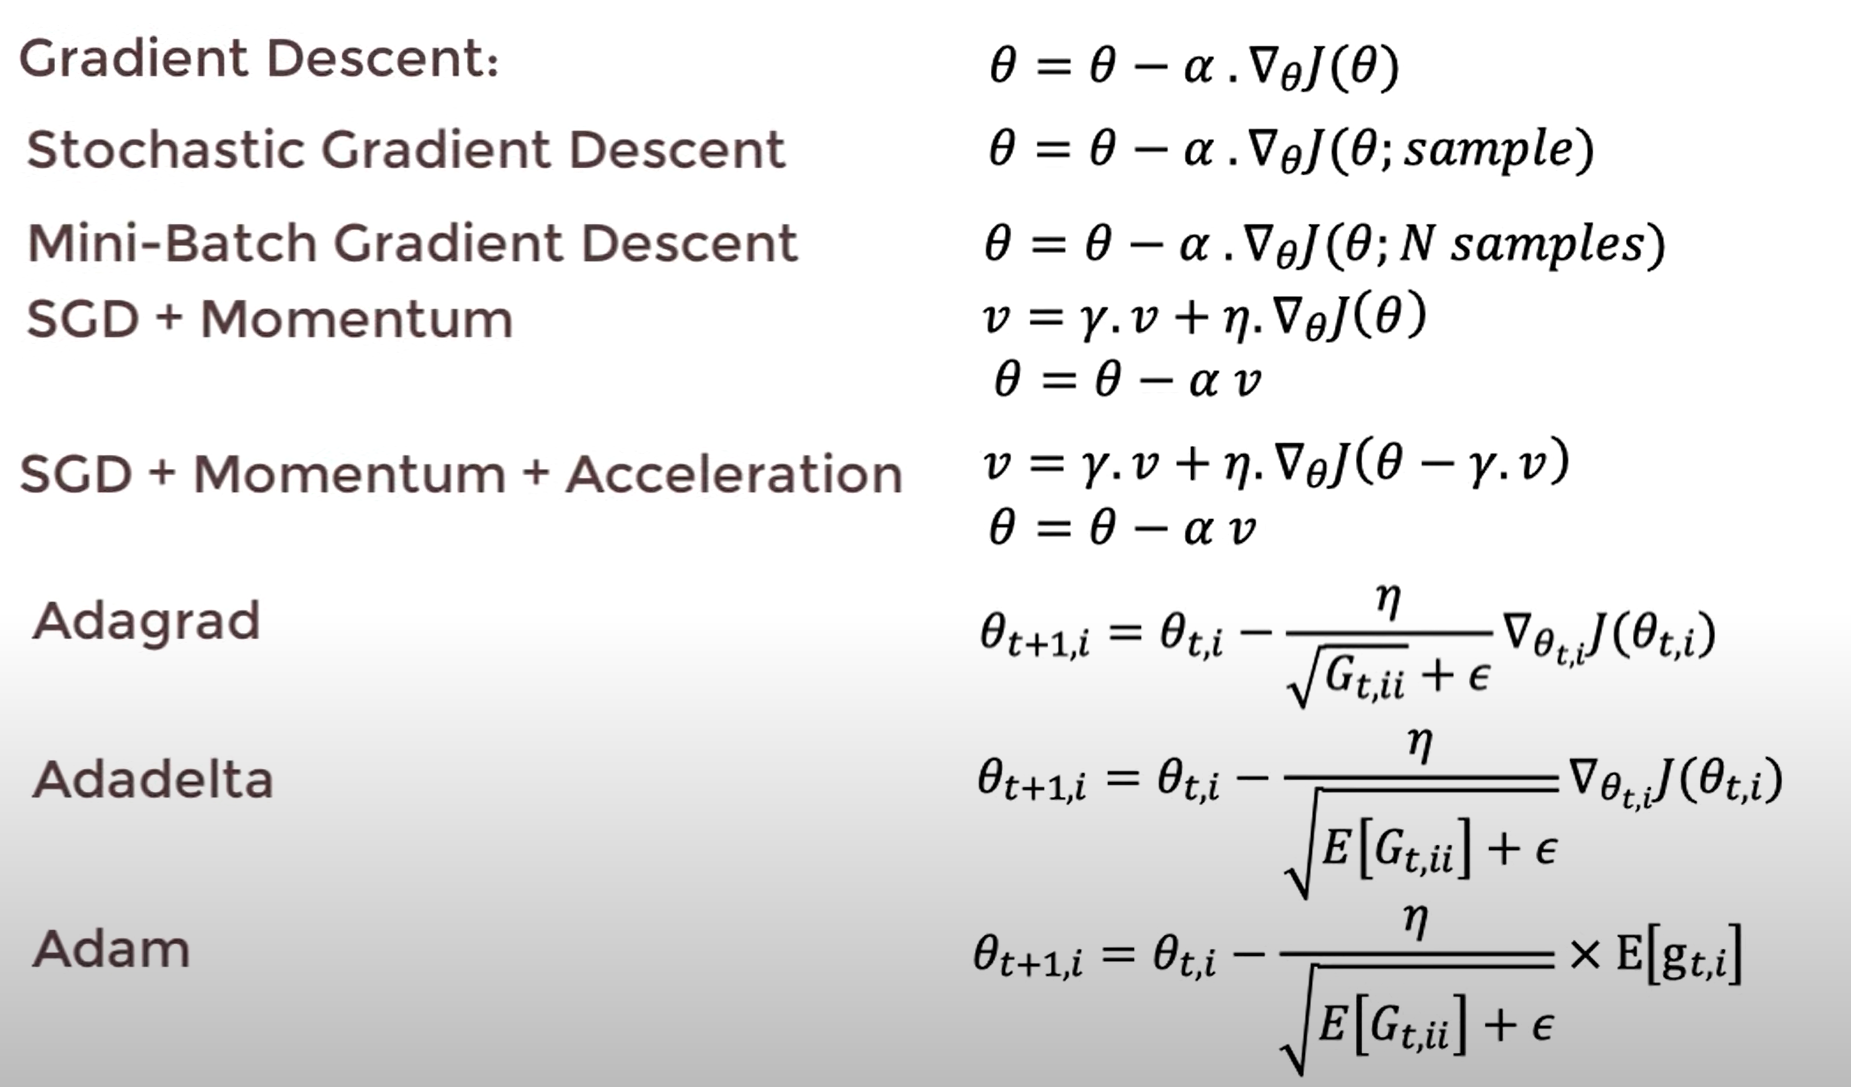

Depende del problema a resolver: Segmentación instantánea, análisis semántico, traducción automática, generación de imágenes, etc. El mejor algoritmo es el que pueda atravesar bien la función de pérdida de ese problema.
